In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
train=pd.read_csv('train.csv');
test=pd.read_csv('test.csv');
total=pd.concat([train,test],ignore_index=True,axis=0)

total

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## missing enteries
### Age - 177
### Cabin - 687
### Embarked - 2

In [12]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
total.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## graph for survived and not survived

Total number of passengers : 891
Total number of passengers survived : 342
Total number of passengers not survived : 549


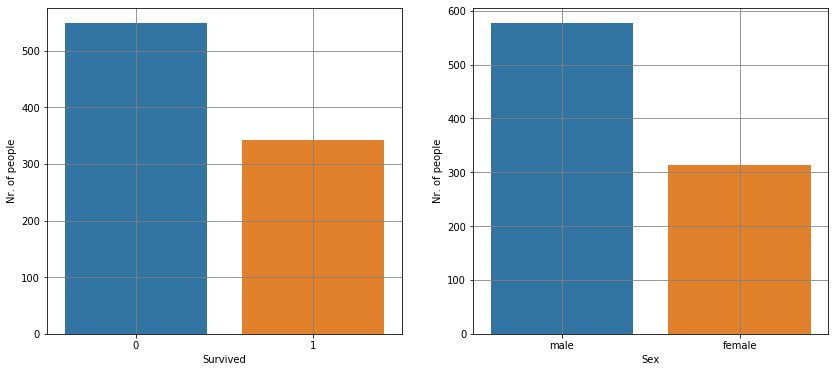

In [14]:
## training set 
print("Total number of passengers :" , len(train))
print("Total number of passengers survived :" ,len(train[train["Survived"]==1]))
print("Total number of passengers not survived :" ,len(train[train["Survived"]==0]))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='Survived',data=train)
plt.xlabel('Survived')
plt.ylabel('Nr. of people')
plt.grid(color='grey')


plt.subplot(1,2,2)
sns.countplot(x='Sex',data=train)
plt.xlabel('Sex')
plt.ylabel('Nr. of people')
plt.grid(color='grey')

plt.show()

In [15]:
#percentage of people survived and not survived 
print("Percentage % of passengers survived :" ,round(len(train[train["Survived"]==1])/len(train)*100,3))
print("Percentage % of passengers not survived :" ,round(len(train[train["Survived"]==0])/len(train)*100,3))

Percentage % of passengers survived : 38.384
Percentage % of passengers not survived : 61.616


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


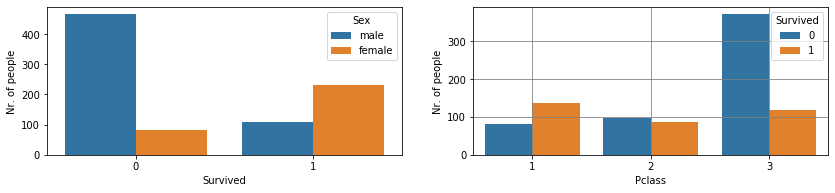

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
print(train.groupby('Sex')['Survived'].value_counts())
sns.countplot('Survived',data=train,hue='Sex')
plt.xlabel('Survived')
plt.ylabel('Nr. of people')

plt.subplot(2,2,2)

sns.countplot(x='Pclass',hue='Survived',data=train)
plt.ylabel('Nr. of people')
plt.grid(color='grey')
plt.show()

In [17]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

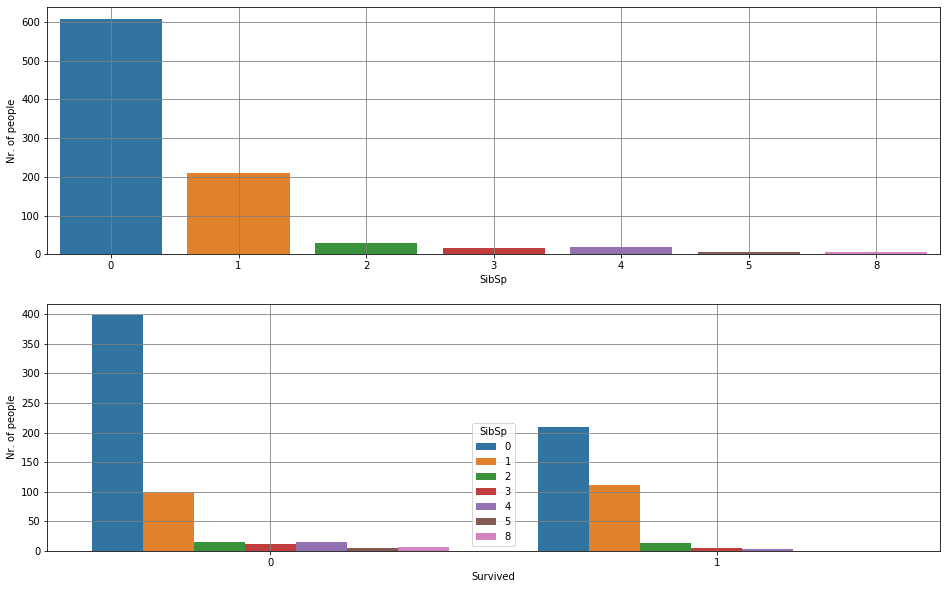

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.countplot(x='SibSp',data=train)
plt.ylabel('Nr. of people')
plt.grid(color='grey')

plt.subplot(2,1,2)
sns.countplot(x='Survived',hue='SibSp',data=train)
plt.ylabel('Nr. of people')
plt.grid(color='grey')
plt.show()

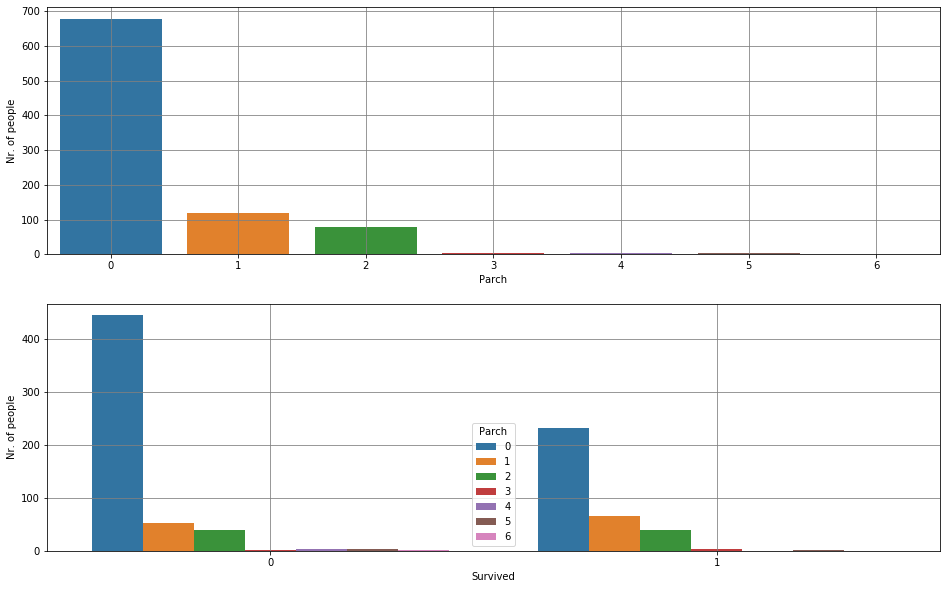

In [19]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.countplot(x='Parch',data=train)
plt.ylabel('Nr. of people')
plt.grid(color='grey')

plt.subplot(2,1,2)
sns.countplot(x='Survived',hue='Parch',data=train)
plt.ylabel('Nr. of people')
plt.grid(color='grey')
plt.show()

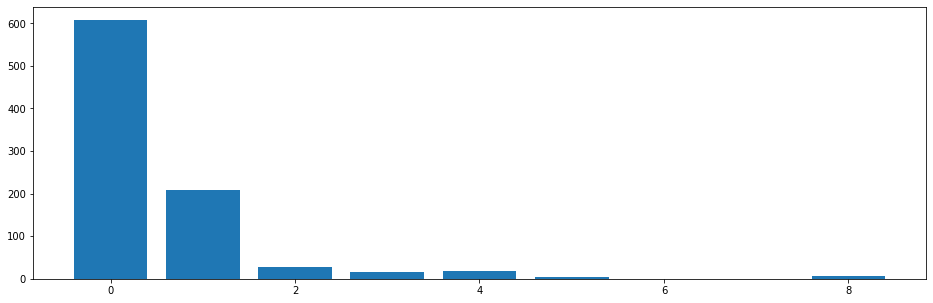

In [20]:
# same with bar graph for example 
sibs=train['SibSp'].value_counts()
sibs.index
plt.figure(figsize=(16,5))
plt.bar(sibs.index,height=sibs)
plt.show()

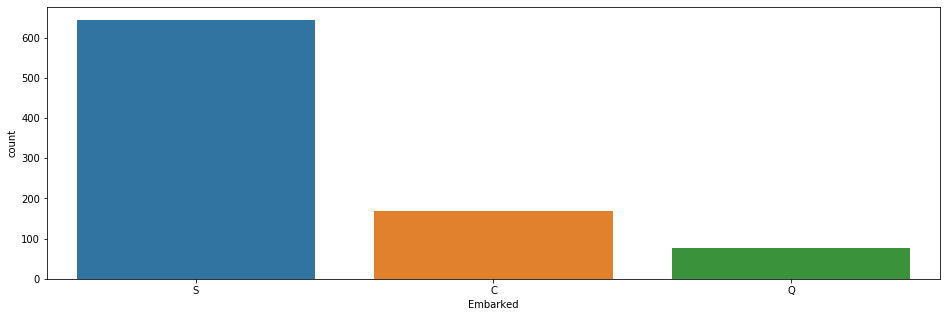

In [21]:
plt.figure(figsize=(16,5))
sns.countplot(x='Embarked',data=train)
plt.show()

In [22]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

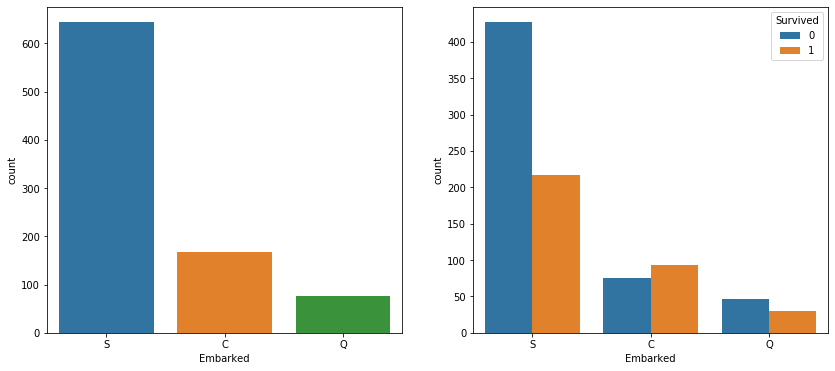

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='Embarked',data=train)

plt.subplot(1,2,2)
sns.countplot(x='Embarked',hue='Survived',data=train)

plt.show()

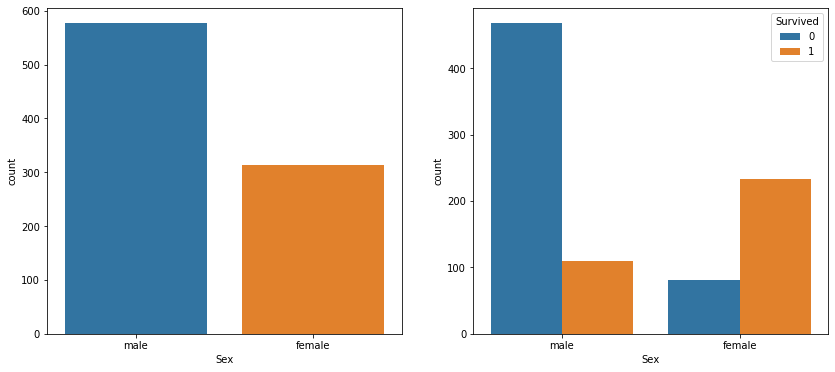

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='Sex',data=train)

plt.subplot(1,2,2)
sns.countplot(x='Sex',hue='Survived',data=train)

plt.show()

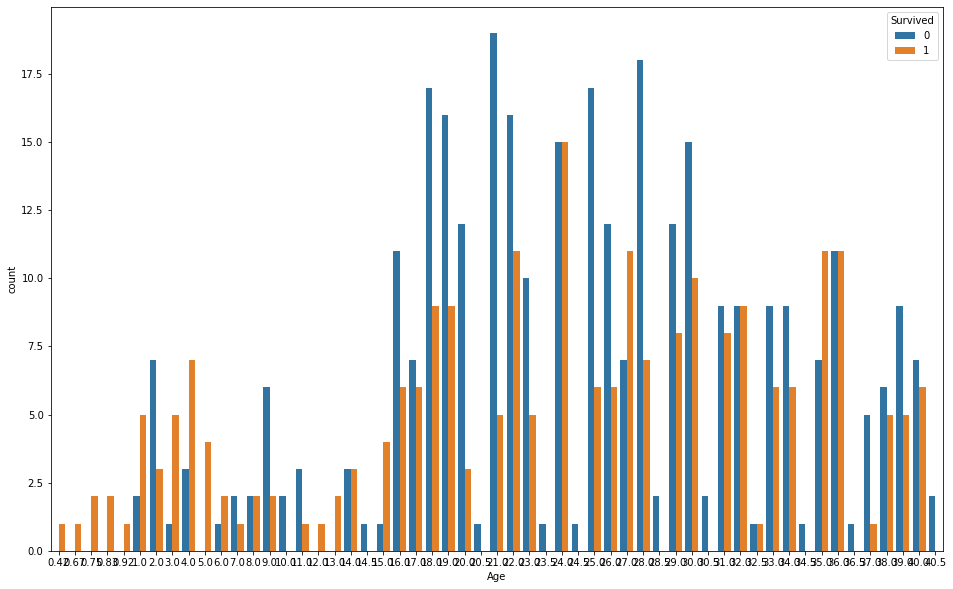

In [25]:
plt.figure(figsize=(16,10))
agelow=train[train['Age']<41]
sns.countplot(x='Age',hue='Survived',data=agelow)
plt.show()

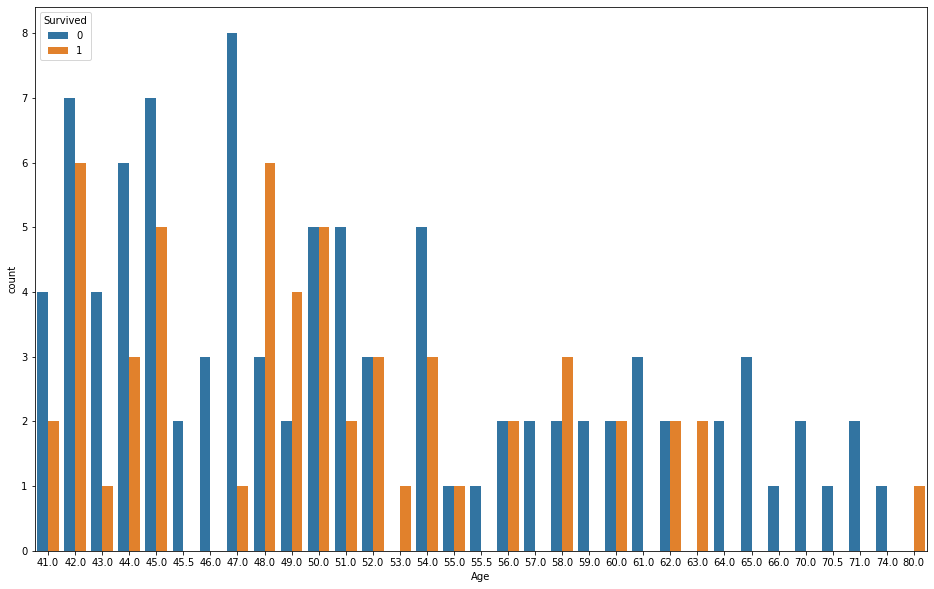

In [26]:
plt.figure(figsize=(16,10))
agehigh=train[train['Age']>=41]
sns.countplot(x='Age',hue='Survived',data=agehigh)
plt.show()

In [27]:
train.groupby('Survived')['Age'].value_counts()

Survived  Age 
0         21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
1         43.0     1
          47.0     1
          53.0     1
          55.0     1
          80.0     1
Name: Age, Length: 142, dtype: int64

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sukhmeet\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


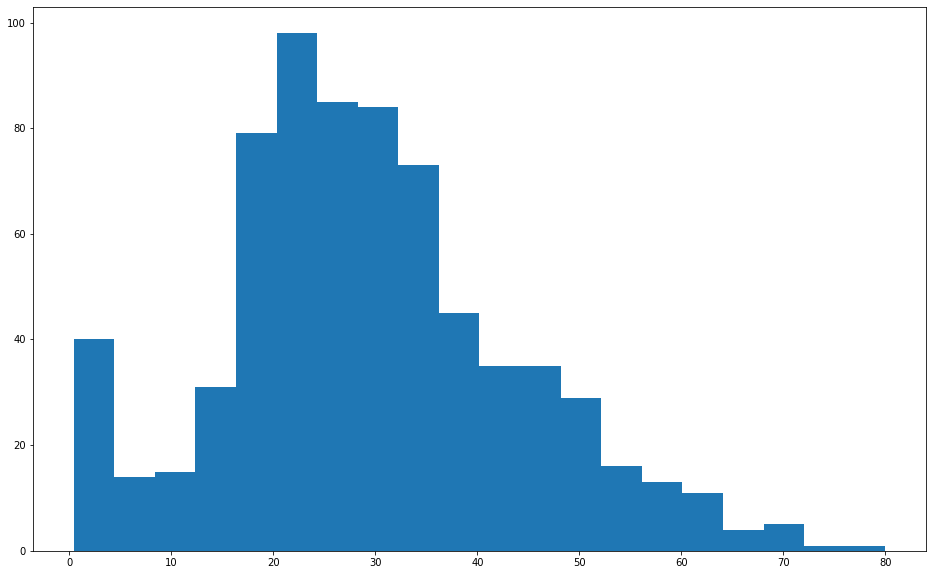

In [28]:
plt.figure(figsize=(16,10))
plt.hist(x='Age',data=train,bins=20)
plt.show()

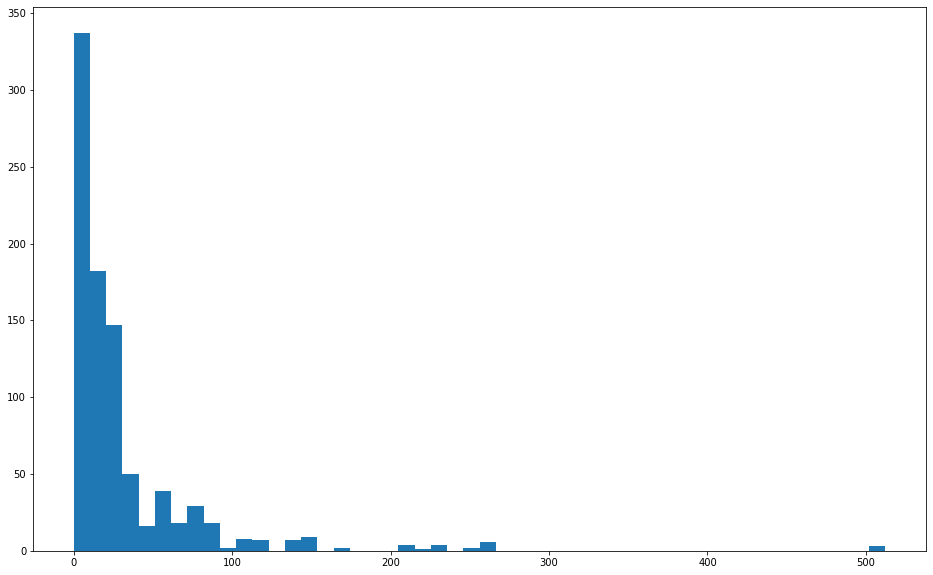

In [29]:
plt.figure(figsize=(16,10))
plt.hist(x='Fare',data=train,bins=50)
plt.show()

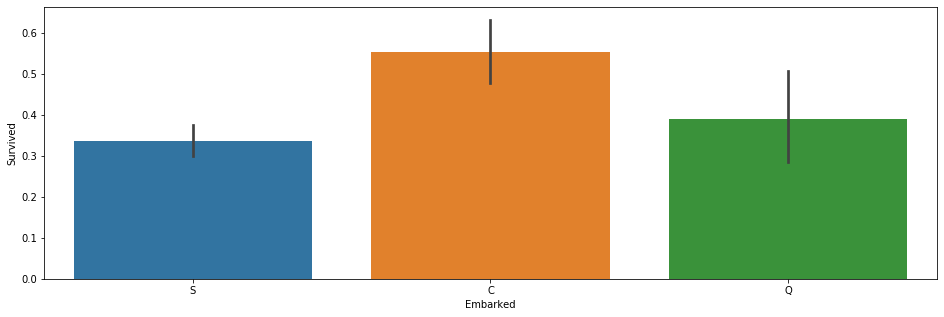

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(x='Embarked',y='Survived',data=train)
plt.show()

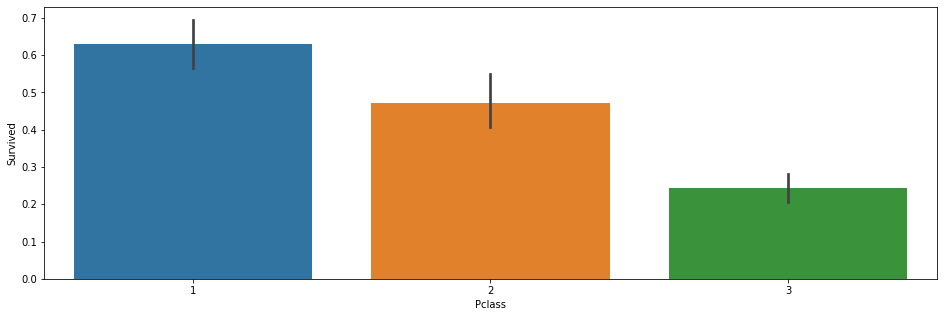

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x='Pclass',y='Survived',data=train)
plt.show()

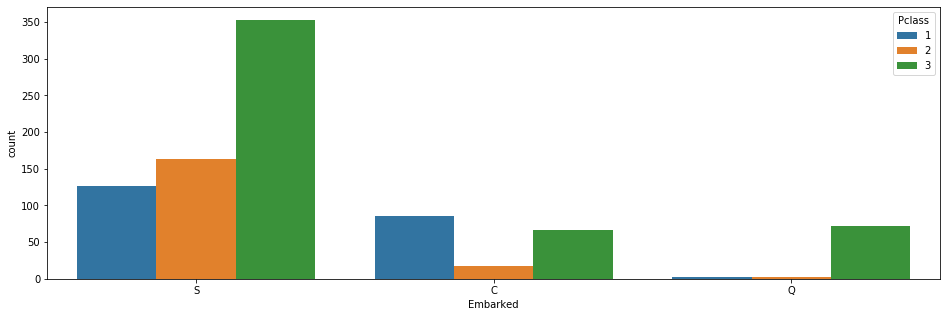

In [32]:
plt.figure(figsize=(16,5))
sns.countplot(x='Embarked',hue='Pclass',data=train)
plt.show()

## Data Cleaning

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
## data cleaning 
# cabin is not required so we can remove it

train.drop('Cabin' , axis=1 , inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
type(train['Embarked'])
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
## as we see most of the data is in S and just 2 were missing 
#so we will add it to S only as it wont make much difference to the count
train['Embarked'].fillna('S',inplace=True)

In [38]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
amount_survived=train['Survived'].value_counts()[1]
amount_nonsurvived=train['Survived'].value_counts()[0]
print(amount_survived)
print(amount_nonsurvived)

342
549


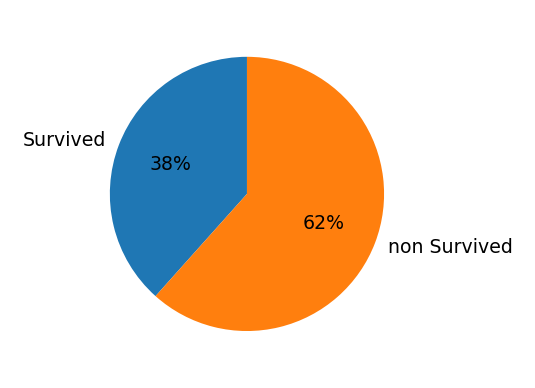

In [41]:
category_names = ['Survived', 'non Survived']
sizes = [amount_survived, amount_nonsurvived]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%')
plt.show()

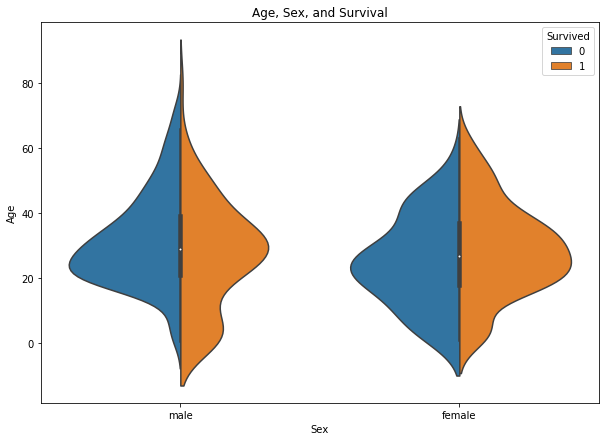

In [42]:
plt.figure(figsize = (10, 7))
plt.title('Age, Sex, and Survival')
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train, split = True)
plt.show()

In [43]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [44]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

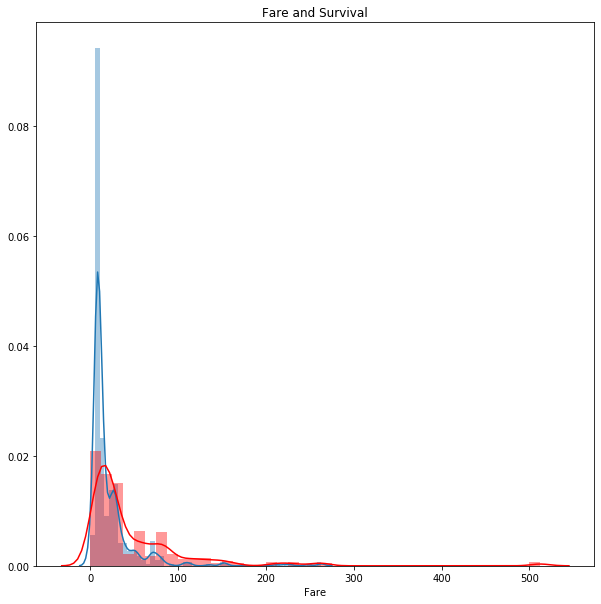

In [45]:
plt.figure(figsize = (10,10))
plt.title("Fare and Survival")
x = train['Fare']
x1 = x[train['Survived'] == 0]
x2 = x[train['Survived'] == 1]
sns.distplot(x1, label = 'Did not survive')
sns.distplot(x2, label = 'Survived', color='red')
plt.show()


In [46]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

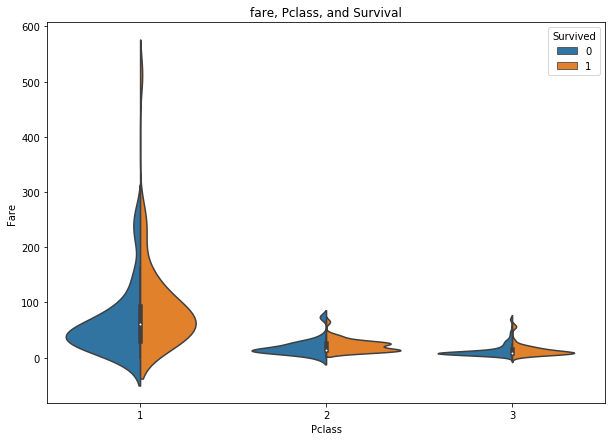

In [47]:
plt.figure(figsize = (10, 7))
plt.title('fare, Pclass, and Survival')
sns.violinplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, split = True)
plt.show()

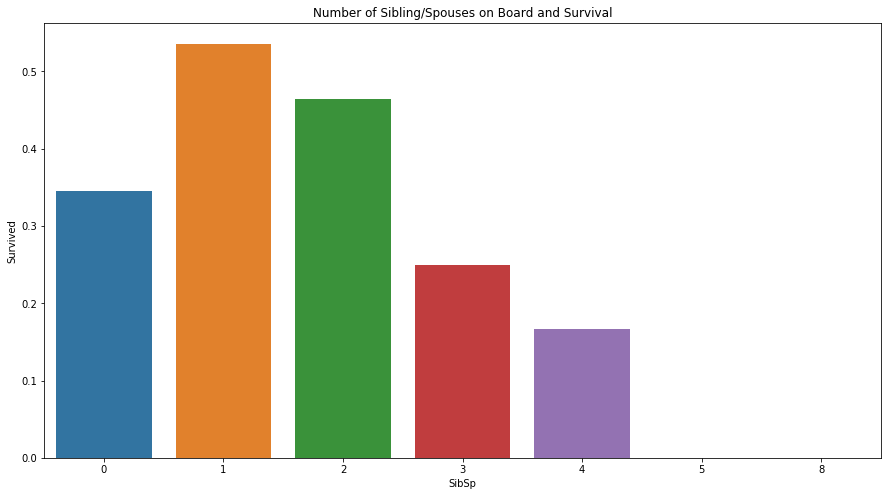

In [48]:
fig = plt.figure(figsize = (15, 8))
plt.title("Number of Sibling/Spouses on Board and Survival")
sns.barplot(x='SibSp', y='Survived', data=train,ci=False)
plt.show()

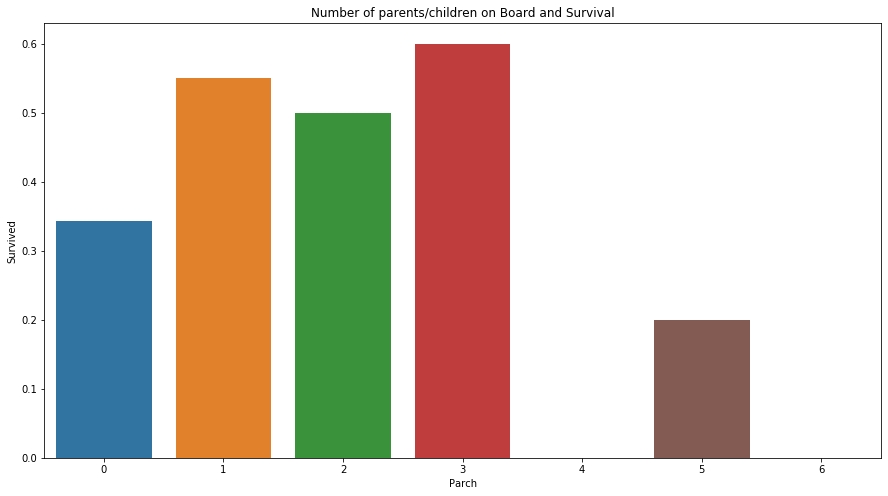

In [49]:
fig = plt.figure(figsize = (15, 8))
plt.title("Number of parents/children on Board and Survival")
sns.barplot(x='Parch', y='Survived', data=train,ci=False)
plt.show()

In [50]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [51]:
total

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [52]:
a=total.loc[total['Pclass']==3]
a

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [53]:
mask=np.zeros_like(train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [54]:
train['Age'].max()

80.0

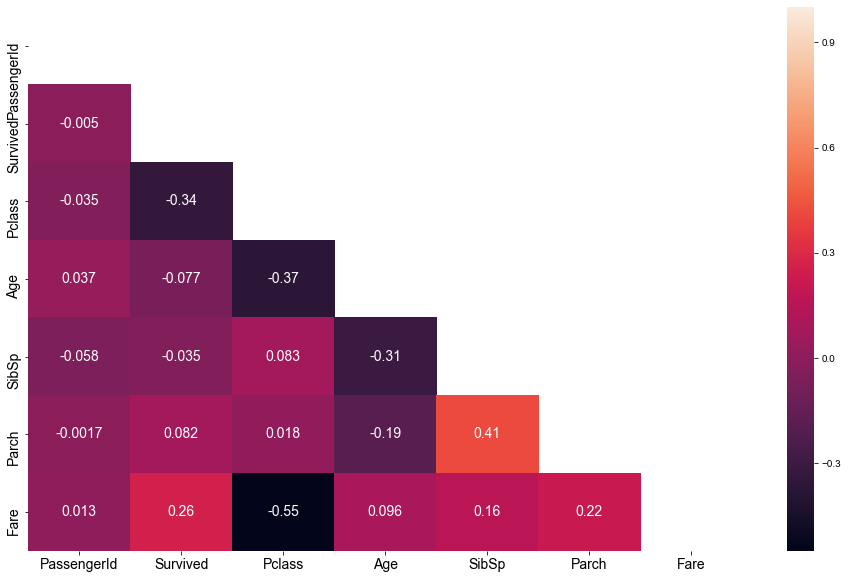

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr() ,annot=True ,annot_kws={"size": 14} , mask= mask )
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [56]:
##graph for survived based on age


In [57]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [58]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [59]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [60]:

def name_split(arr):
    return (arr.split(',')[1].split('.')[0])

total['Title']=total['Name'].apply(name_split)

In [61]:
total['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [62]:
total['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Lady              1
 Mme               1
 Capt              1
 Sir               1
 Dona              1
 Don               1
 the Countess      1
 Jonkheer          1
Name: Title, dtype: int64

In [63]:
total['Title']=total['Title'].str.replace('Capt','Military')
total['Title']=total['Title'].str.replace('Major','Military')
total['Title']=total['Title'].str.replace('Col','Military')
total['Title']=total['Title'].str.replace('Jonkheer','Fancy')

total['Title']=total['Title'].str.replace('Don','Fancy')
total['Title']=total['Title'].str.replace('Dona','Fancy')
total['Title']=total['Title'].str.replace('Sir','Fancy')
total['Title']=total['Title'].str.replace('Lady','Fancy')
total['Title']=total['Title'].str.replace('Fancya','Fancy')
total['Title']=total['Title'].str.replace('Mlle', 'Miss')
total['Title']=total['Title'].str.replace('Mme', 'Mrs')
total['Title']=total['Title'].str.replace('Ms', 'Miss')


In [64]:
total['Title'].value_counts()

 Mr              757
 Miss            264
 Mrs             198
 Master           61
 Dr                8
 Rev               8
 Military          7
 Fancy             5
 the Countess      1
Name: Title, dtype: int64

In [65]:
total.groupby('Title')['Age'].mean()

Title
 Dr              43.571429
 Fancy           42.800000
 Master           5.482642
 Military        54.714286
 Miss            21.824366
 Mr              32.252151
 Mrs             36.918129
 Rev             41.250000
 the Countess    33.000000
Name: Age, dtype: float64

In [66]:
total.groupby('Title')['Age'].median()

Title
 Dr              49.0
 Fancy           40.0
 Master           4.0
 Military        53.0
 Miss            22.0
 Mr              29.0
 Mrs             35.0
 Rev             41.5
 the Countess    33.0
Name: Age, dtype: float64

In [67]:
total['Title'].value_counts()

 Mr              757
 Miss            264
 Mrs             198
 Master           61
 Dr                8
 Rev               8
 Military          7
 Fancy             5
 the Countess      1
Name: Title, dtype: int64

In [68]:
total.loc[total['Title'].str.contains('Mr') &np.isnan(total['Age']),'Age']=29.0
total.loc[total['Title'].str.contains('Dr') & np.isnan(total['Age']),'Age']=49.0
total.loc[total['Title'].str.contains('Fancy') & np.isnan(total['Age']),'Age']=40.0
total.loc[total['Title'].str.contains('Military') & np.isnan(total['Age']),'Age']=53.0
total.loc[total['Title'].str.contains('Miss') & np.isnan(total['Age']),'Age']=22.0
total.loc[total['Title'].str.contains('Mrs') & np.isnan(total['Age']),'Age']=35.0
total.loc[total['Title'].str.contains('Rev') & np.isnan(total['Age']),'Age']=41.0
total.loc[total['Title'].str.contains('Master') & np.isnan(total['Age']),'Age']=61.0

In [69]:
total['Age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Age, Length: 1309, dtype: bool

In [70]:
total['Family Size'] = total['SibSp'] + total['Parch'] + 1


In [71]:
total

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,1
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Fancy,1
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,1
1307,29.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,1


In [72]:
total['IsAlone']=1

In [73]:
total

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,1,1
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Fancy,1,1
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,1,1
1307,29.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,1,1


In [74]:
total.head(100)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.0,NaN,S,8.0500,"Shorney, Mr. Charles Joseph",0,96,3,male,0,0.0,374910,Mr,1,1
96,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,97,1,male,0,0.0,PC 17754,Mr,1,1
97,23.0,D10 D12,C,63.3583,"Greenfield, Mr. William Bertram",1,98,1,male,0,1.0,PC 17759,Mr,2,1
98,34.0,NaN,S,23.0000,"Doling, Mrs. John T (Ada Julia Bone)",1,99,2,female,0,1.0,231919,Mrs,2,1


In [75]:
# update to 0 if alone
total['IsAlone'].loc[total['Family Size'] > 1] = 0

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
total.head(100)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.0,NaN,S,8.0500,"Shorney, Mr. Charles Joseph",0,96,3,male,0,0.0,374910,Mr,1,1
96,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,97,1,male,0,0.0,PC 17754,Mr,1,1
97,23.0,D10 D12,C,63.3583,"Greenfield, Mr. William Bertram",1,98,1,male,0,1.0,PC 17759,Mr,2,0
98,34.0,NaN,S,23.0000,"Doling, Mrs. John T (Ada Julia Bone)",1,99,2,female,0,1.0,231919,Mrs,2,0


In [77]:
total.isnull().any()

Age            False
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
Title          False
Family Size    False
IsAlone        False
dtype: bool

In [78]:
total[total['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1


In [79]:
total[total['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1


In [80]:
total['Fare'].skew()

4.367709134122922

In [81]:
round(total['Fare'].median(),2)

14.45

In [82]:
total.loc[total['Fare'].isnull() ,'Fare']=14.45

In [83]:
total[total['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone


In [84]:
## As most of the Embarked belong to S so we will assign this also to the same
total.loc[total['Embarked'].isnull(),'Embarked']='S'

In [85]:
total.drop('Cabin',axis=1)



,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,IsAlone
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.0,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,1,1
1305,39.0,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Fancy,1,1
1306,38.5,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,1,1
1307,29.0,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,1,1


In [86]:
post=pd.get_dummies(total['Title'] )

In [87]:
post

,Dr,Fancy,Master,Military,Miss,Mr,Mrs,Rev,the Countess
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1304,0,0,0,0,0,1,0,0,0
1305,0,1,0,0,0,0,0,0,0
1306,0,0,0,0,0,1,0,0,0
1307,0,0,0,0,0,1,0,0,0


In [88]:
sex_dum=pd.get_dummies(total['Sex'])

In [89]:
sex_dum

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


In [90]:
Embarked_dum=pd.get_dummies(total['Embarked'])

In [91]:
Embarked_dum

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [92]:
total_update=pd.concat([total,post,Embarked_dum,sex_dum] , axis=1)

In [93]:
total_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Title            1309 non-null object
Family Size      1309 non-null int64
IsAlone          1309 non-null int64
 Dr              1309 non-null uint8
 Fancy           1309 non-null uint8
 Master          1309 non-null uint8
 Military        1309 non-null uint8
 Miss            1309 non-null uint8
 Mr              1309 non-null uint8
 Mrs             1309 non-null uint8
 Rev             1309 non-null uint8
 the Countess    1309 non-null u

In [94]:
total_update=total_update.drop(['Name','Ticket','Cabin','Embarked','Sex','Title'],axis=1)

In [95]:
total_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
SibSp            1309 non-null int64
Survived         891 non-null float64
Family Size      1309 non-null int64
IsAlone          1309 non-null int64
 Dr              1309 non-null uint8
 Fancy           1309 non-null uint8
 Master          1309 non-null uint8
 Military        1309 non-null uint8
 Miss            1309 non-null uint8
 Mr              1309 non-null uint8
 Mrs             1309 non-null uint8
 Rev             1309 non-null uint8
 the Countess    1309 non-null uint8
C                1309 non-null uint8
Q                1309 non-null uint8
S                1309 non-null uint8
female           1309 non-null uint8
male             1309 non-null uint8
dtypes: float64(3), int64(6), uint8(1

In [96]:
X_data=total_update.drop('Survived',axis=1)

In [97]:
y_data=total_update['Survived']

In [98]:
X_top=X_data[:891]
X_test_final=X_data[891:]
y_top=y_data[:891]
y_test_final=y_data[891:]

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_top,y_top,test_size=0.3,random_state=4)

In [100]:
scaler = StandardScaler()

In [101]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_final_scaled=scaler.transform(X_test_final)

In [102]:
y_train

537    1.0
401    0.0
554    1.0
213    0.0
434    0.0
      ... 
360    0.0
709    1.0
439    0.0
174    0.0
122    0.0
Name: Survived, Length: 623, dtype: float64

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [104]:
KClassifier=KNeighborsClassifier(n_neighbors=5)

In [105]:
log_reg=LogisticRegression()

In [106]:
RainF=RandomForestClassifier()

In [107]:
tree_entr = DecisionTreeClassifier(criterion = 'entropy')

In [108]:
tree_gini = DecisionTreeClassifier(criterion = 'gini')

In [109]:
svc_model = SVC(kernel='rbf')

svc_model_lin = SVC(kernel='linear')

In [110]:
KClassifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [111]:
log_reg.fit(X_train_scaled,y_train)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
RainF.fit(X_train_scaled,y_train)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [114]:
svc_model_lin.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
tree_entr.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
tree_gini.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
y_predict_svc=svc_model.predict(X_test_scaled)

In [118]:
y_predict_gini=tree_gini.predict(X_test_scaled)

In [119]:
y_predict_entr=tree_entr.predict(X_test_scaled)

In [120]:
y_predict_svc_lin=svc_model_lin.predict(X_test_scaled)

In [121]:
y_predict_classifier=KClassifier.predict(X_test_scaled)

In [122]:
y_predict_rainF=RainF.predict(X_test_scaled)

In [123]:
y_predict_log=log_reg.predict(X_test_scaled)

In [124]:
cm_svc=confusion_matrix(y_test, y_predict_svc)

In [125]:
svc_acc = accuracy_score(y_test, y_predict_svc)

In [126]:
svc_acc

0.8694029850746269

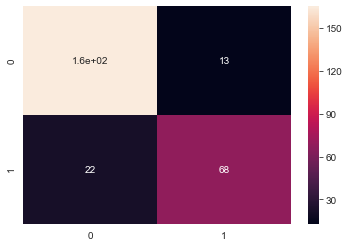

In [127]:
sns.heatmap(cm_svc,annot=True)

In [128]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       178
         1.0       0.84      0.76      0.80        90

    accuracy                           0.87       268
   macro avg       0.86      0.84      0.85       268
weighted avg       0.87      0.87      0.87       268



In [129]:
cm_gini=confusion_matrix(y_test, y_predict_gini)
cm_entr=confusion_matrix(y_test, y_predict_entr)
cm_classifier=confusion_matrix(y_test, y_predict_classifier)
cm_log=confusion_matrix(y_test, y_predict_log)
cm_rainF=confusion_matrix(y_test, y_predict_rainF)
cm_svc_lin=confusion_matrix(y_test, y_predict_svc_lin)

In [130]:
gini_acc = accuracy_score(y_test, y_predict_gini)
entr_acc = accuracy_score(y_test, y_predict_entr)
classifier_acc = accuracy_score(y_test, y_predict_classifier)
log_acc = accuracy_score(y_test, y_predict_log)
rainF_acc = accuracy_score(y_test, y_predict_rainF)
svc_lin_acc = accuracy_score(y_test, y_predict_svc_lin)

In [131]:
accuracy_ser=pd.Series([gini_acc,entr_acc,classifier_acc,log_acc,rainF_acc,svc_lin_acc],index=['gini_acc','entr_acc','classifier_acc','log_acc','rainF_acc','svc_lin_acc'])

In [132]:
accuracy_ser

gini_acc          0.805970
entr_acc          0.809701
classifier_acc    0.850746
log_acc           0.865672
rainF_acc         0.858209
svc_lin_acc       0.858209
dtype: float64